In [1]:
import foolbox as fb

In [2]:
import torch
import torchvision

In [3]:
torch.__version__

'1.9.0+cu102'

In [4]:
torch.cuda.is_available()

True

In [5]:
model = torchvision.models.resnet18(pretrained=True)

In [6]:
model = model.eval()

In [7]:
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
bounds = (0, 1)
fmodel = fb.PyTorchModel(model, bounds=bounds, preprocessing=preprocessing)

In [8]:
fmodel = fmodel.transform_bounds((0, 1))

In [9]:
assert fmodel.bounds == (0, 1)

In [10]:
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=8)

In [11]:
torch.cuda.empty_cache()

In [12]:
fb.utils.accuracy(fmodel, images, labels)

/home/cfarah/robustbench/env/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0.875

In [13]:
type(images), images.shape

(torch.Tensor, torch.Size([8, 3, 224, 224]))

In [14]:
attack = fb.attacks.LinfDeepFoolAttack()

In [15]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

In [16]:
is_adv

tensor([True, True, True, True, True, True, True, True], device='cuda:0')

In [17]:
labels

tensor([243, 559, 438, 990, 949, 853, 609, 609], device='cuda:0')

In [18]:
target_classes = (labels + 200) % 1000

In [19]:
target_classes

tensor([443, 759, 638, 190, 149,  53, 809, 809], device='cuda:0')

In [20]:
criterion = fb.criteria.TargetedMisclassification(target_classes)

In [21]:
attack = fb.attacks.L2CarliniWagnerAttack(steps=100)

In [22]:
epsilons = None

In [23]:
advs, _, is_adv = attack(fmodel, images, criterion, epsilons=epsilons)

In [24]:
is_adv

tensor([True, True, True, True, True, True, True, True], device='cuda:0')

In [25]:
fb.distances.l2(images, advs)

tensor([0.8982, 0.9787, 0.5469, 0.8635, 0.7121, 1.4742, 0.5181, 0.7975],
       device='cuda:0')

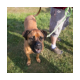

In [31]:
fb.plot.images(images[0:1])

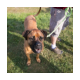

In [32]:
fb.plot.images(advs[0:1])

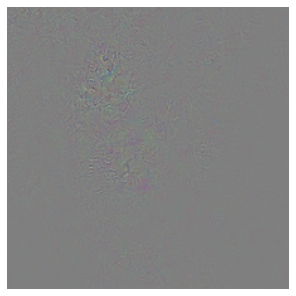

In [33]:
fb.plot.images(advs - images, n=1, bounds=(-0.1, 0.1), scale=4.)